In [15]:
import numpy as np
import pandas as pd
import os
from datetime import datetime,timedelta
import math
import matplotlib.pyplot as plt
import seaborn  



In [16]:
from_str='2023-05-01'
to_str='2023-08-25'
#feq ='W-FRI'  
feq ='M'

In [17]:
data_file='data/my_philip_fund_May-Aug_23.csv'
title='my_philip_fund_May-Aug_23'
report_path=f'report'


print(report_path)

report


In [18]:
# build period datafrme
period_index=pd.date_range(start=from_str,end=to_str, freq=feq)
print(period_index)

list_period_index=list(period_index)
if feq=='M':
    if  list_period_index[-1] < datetime.strptime(to_str,'%Y-%m-%d'):
     list_period_index.append(datetime.strptime(to_str,'%Y-%m-%d'))
print(list_period_index)

DatetimeIndex(['2023-05-31', '2023-06-30', '2023-07-31'], dtype='datetime64[ns]', freq='M')
[Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), datetime.datetime(2023, 8, 25, 0, 0)]


In [19]:
fundPerfByPeriod_df=pd.DataFrame(data=list_period_index,columns=['End_Date'])
fundPerfByPeriod_df['Start_Date']=np.nan
fundPerfByPeriod_df=fundPerfByPeriod_df[['Start_Date','End_Date']]
fundPerfByPeriod_df

,Start_Date,End_Date
0,NaN,2023-05-31
1,NaN,2023-06-30
2,NaN,2023-07-31
3,NaN,2023-08-25


In [20]:
print(f"Create the first date of each {feq} by iteration")
for index,row in fundPerfByPeriod_df.iterrows():
    if index==0:
       fundPerfByPeriod_df.iloc[0,0]=datetime.strptime(from_str,'%Y-%m-%d')
    else:
        # get End_Date(last day of Year, Quater,Month) of previouse row 
        prev_end_date= fundPerfByPeriod_df.iloc[index-1,1] 
        start_date=prev_end_date + timedelta(days = 1) # 
        fundPerfByPeriod_df.iloc[index,0]=start_date 
    # print(fundPerfByPeriod_df) 
    # print(f"=================index={index}=================")
print(fundPerfByPeriod_df.info())
fundPerfByPeriod_df

Create the first date of each M by iteration
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_Date  4 non-null      object        
 1   End_Date    4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 192.0+ bytes
None


,Start_Date,End_Date
0,2023-05-01 00:00:00,2023-05-31
1,2023-06-01 00:00:00,2023-06-30
2,2023-07-01 00:00:00,2023-07-31
3,2023-08-01 00:00:00,2023-08-25


In [21]:
fundPerfByPeriod_df['Start_Date']=pd.to_datetime(fundPerfByPeriod_df['Start_Date'],format='%Y-%m-%d %H:%M:%S')  

fundPerfByPeriod_df['Period']= fundPerfByPeriod_df.apply( lambda item:f"{item['Start_Date'].strftime('%d')}{item['Start_Date'].strftime('%b')}{item['Start_Date'].strftime('%y')}-{item['End_Date'].strftime('%d')}{item['End_Date'].strftime('%b')}{item['End_Date'].strftime('%y')}"  ,axis=1  )
fundPerfByPeriod_df.info()
fundPerfByPeriod_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_Date  4 non-null      datetime64[ns]
 1   End_Date    4 non-null      datetime64[ns]
 2   Period      4 non-null      object        
dtypes: datetime64[ns](2), object(1)
memory usage: 224.0+ bytes


,Start_Date,End_Date,Period
0,2023-05-01,2023-05-31,01May23-31May23
1,2023-06-01,2023-06-30,01Jun23-30Jun23
2,2023-07-01,2023-07-31,01Jul23-31Jul23
3,2023-08-01,2023-08-25,01Aug23-25Aug23


In [22]:
df = pd.read_csv(data_file,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
df.index.set_names('date',inplace=True)
df.rename(columns={'Ticker':'symbol','close':'price'},inplace=True)
df=df[['symbol','price']]
df.info()
print(df.tail(5))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 578 entries, 2023-05-02 to 2023-08-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  578 non-null    object 
 1   price   578 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.5+ KB
           symbol  price
date                    
2023-08-22    VNM  14.38
2023-08-23    VNM  14.32
2023-08-24    VNM  14.50
2023-08-25    VNM  14.58
2023-08-28    VNM  14.91


In [23]:
list_fund_name=df['symbol'].unique().tolist()  
print(list_fund_name)

['^SET.BK', 'AAXJ', 'ACWI', 'GLD', 'IGM', 'SPY', 'VNM']


In [24]:
dictPriceOfFund={}
for name in list_fund_name:
  fund_df=df.query('symbol==@name')
  fund_df=fund_df.loc[from_str:to_str,['price']]
  fund_df.sort_index(inplace=True)
  if len(fund_df)  >0:
      dictPriceOfFund[name]=fund_df  
      print(f"======={name} : {len(fund_df)}==========")  
      print(fund_df.tail(3))    
        

=======^SET.BK : 78==========
              price
date               
2023-08-23  1549.01
2023-08-24  1557.41
2023-08-25  1560.20
=======AAXJ : 82==========
            price
date             
2023-08-23  64.92
2023-08-24  64.70
2023-08-25  64.80
=======ACWI : 82==========
            price
date             
2023-08-23  95.12
2023-08-24  93.91
2023-08-25  94.48
=======GLD : 82==========
             price
date              
2023-08-23  177.89
2023-08-24  177.85
2023-08-25  177.62
=======IGM : 82==========
             price
date              
2023-08-23  395.60
2023-08-24  386.90
2023-08-25  389.49
=======SPY : 82==========
             price
date              
2023-08-23  443.03
2023-08-24  436.89
2023-08-25  439.97
=======VNM : 82==========
            price
date             
2023-08-23  14.32
2023-08-24  14.50
2023-08-25  14.58


In [25]:
report_path=os.path.join (report_path, f"{title}-{feq}-{from_str}_{to_str}")
if not os.path.exists(report_path):
 os.makedirs(report_path)



In [26]:
def create_pct_acc_df(df_temp,start_pct,end_pct):
    df_temp=fund_df.loc[start_pct:end_pct,:]
    df_temp['return_pct']=df_temp['price'].pct_change()  
    df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
    df_temp=df_temp.drop(columns=['price','return_pct'])
    df_temp.fillna(1,inplace=True)   
    return df_temp
    

plot chart line to compare return performace on each period


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24688\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24688\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24688\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

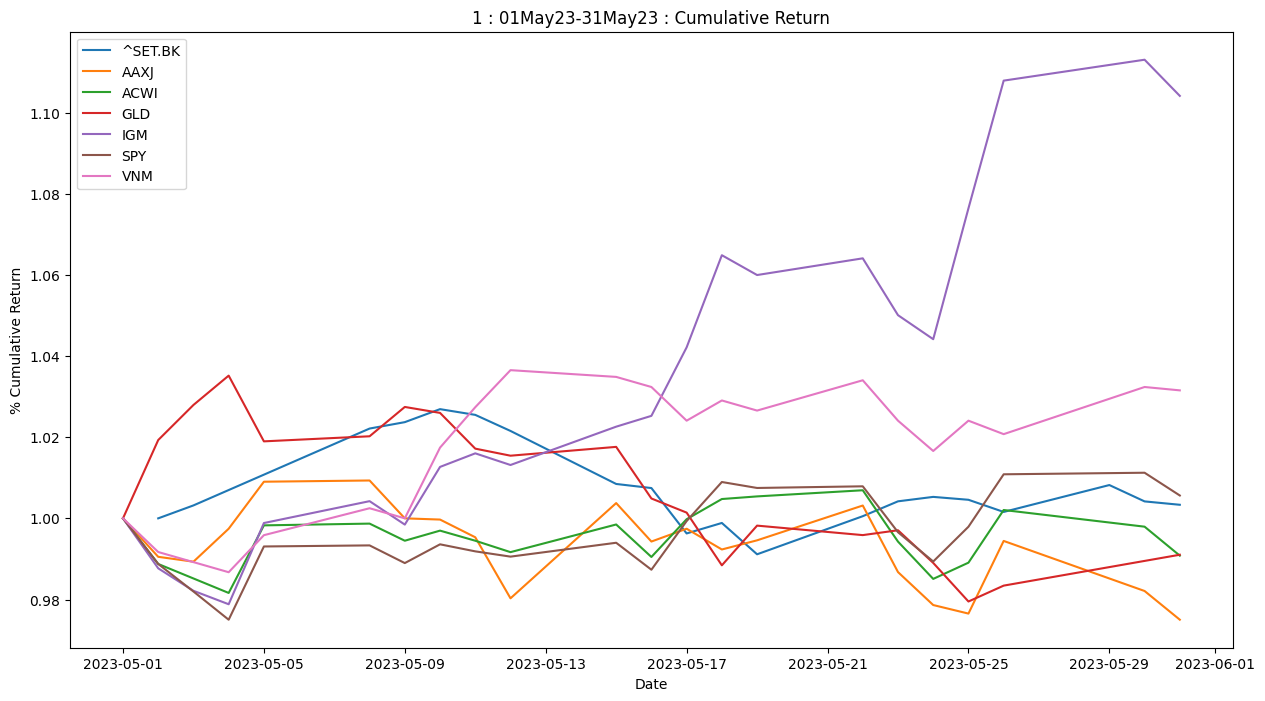

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24688\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24688\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24688\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

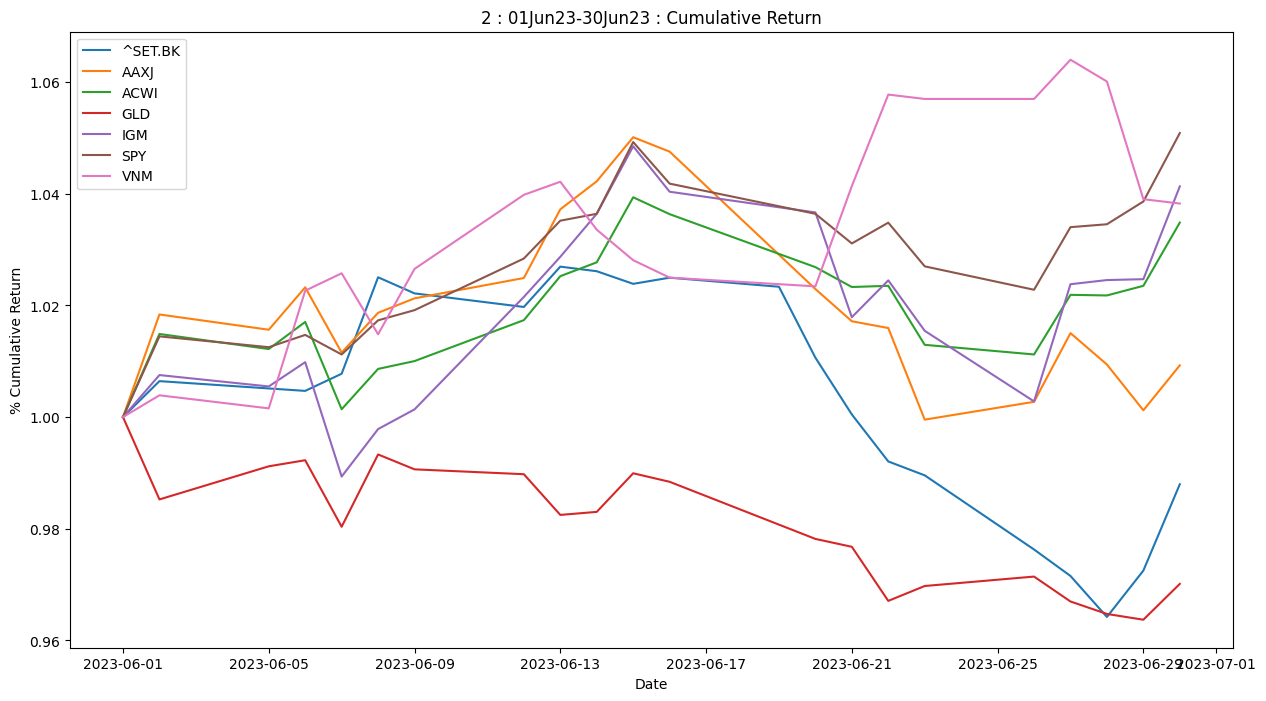

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24688\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24688\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24688\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

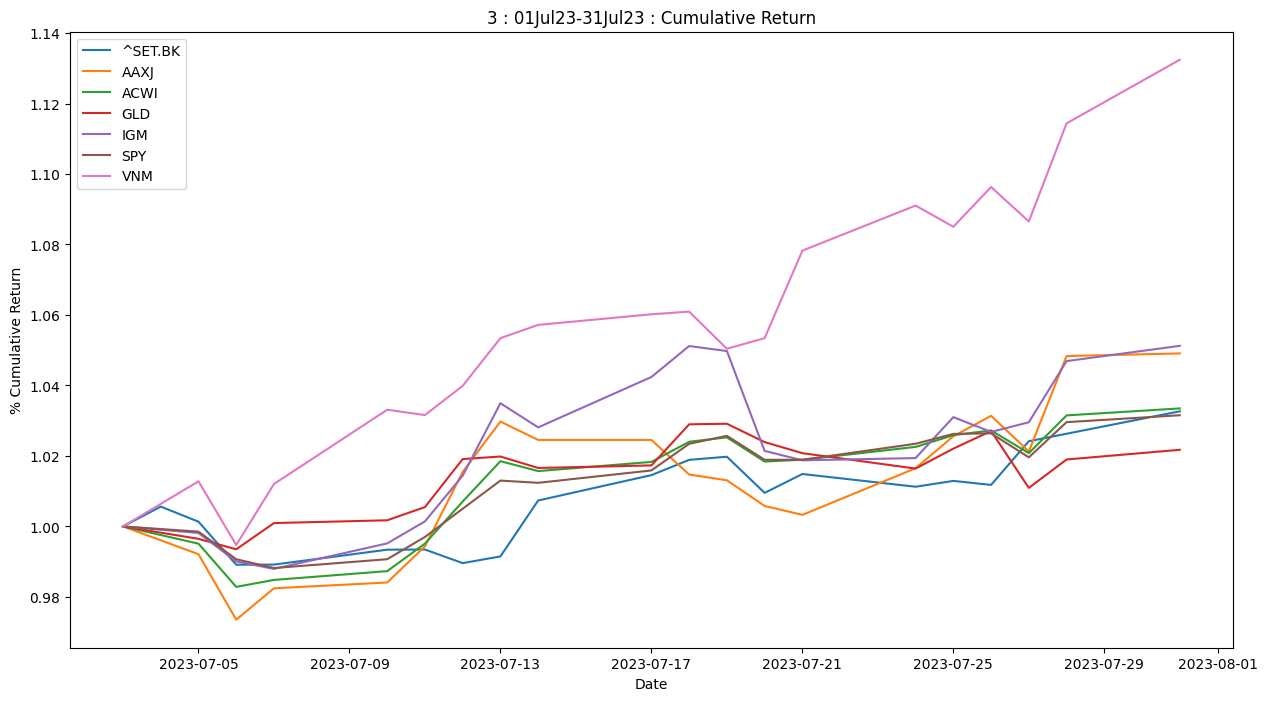

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24688\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24688\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24688\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

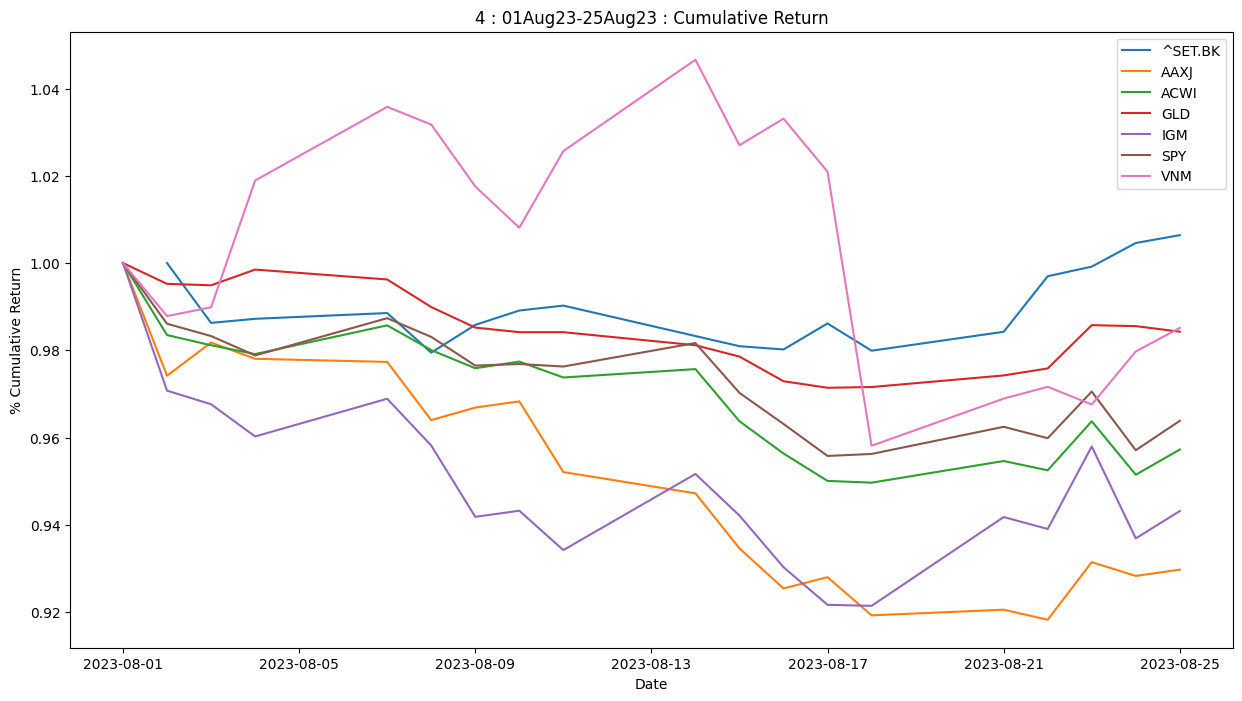

In [27]:
print("plot chart line to compare return performace on each period")
count_pic=0
for index,item in fundPerfByPeriod_df.iterrows():
    start_date=item['Start_Date']
    end_date=item['End_Date'] 
    fig = plt.figure(figsize = (15, 8))
    for fund_name,fund_df in dictPriceOfFund.items():
        df=create_pct_acc_df(fund_df,start_date,end_date) 
        plt.plot(df.index,df['cum_return_pct'],label =fund_name)  
    plt.legend()    
    plt.xlabel("Date")
    plt.ylabel("% Cumulative Return")
    
    count_pic=count_pic+1
    plt.title(f"{count_pic} : {item['Period']} : Cumulative Return")
    
    plt.savefig(f'{report_path}\\{count_pic}-{item["Period"]}.png')
    plt.show() 
    


In [29]:
def cal_percent_return(item,fundTemp_df):
    start_date=item['Start_Date']
    end_date=item['End_Date']
    tempDF=fundTemp_df.loc[start_date:end_date,:]
    if tempDF.empty==False:
      start_price=float(tempDF.iloc[0, 0])
      end_price=float(tempDF.iloc[len(tempDF)-1, 0])   
      invest_return=(  end_price- start_price)/ start_price*100
      invest_return=round(invest_return,2)  
                        
      print(f"{start_date.strftime('%d%b%y')} to {end_date.strftime('%d%b%y')}: ROC = ({end_price}-{start_price})/{start_price}x100= {invest_return} %")    
      return invest_return                  
    else:
                        
      return 0                  
        
    
    

In [30]:
for name,data in dictPriceOfFund.items():
  print(f"======================{name}======================")  
  fundPerfByPeriod_df[name]=fundPerfByPeriod_df.apply(cal_percent_return,axis=1,args=(data,))

fundPerfByPeriod_df["_AVG_"]=fundPerfByPeriod_df[list_fund_name].mean(axis=1,skipna=True).round(2)

fundPerfByPeriod_df.set_index('Period',inplace=True)   


======================^SET.BK======================
01May23 to 31May23: ROC = (1533.54-1528.43)/1528.43x100= 0.33 %
01Jun23 to 30Jun23: ROC = (1503.1-1521.4)/1521.4x100= -1.2 %
01Jul23 to 31Jul23: ROC = (1556.06-1506.84)/1506.84x100= 3.27 %
01Aug23 to 25Aug23: ROC = (1560.2-1550.28)/1550.28x100= 0.64 %
======================AAXJ======================
01May23 to 31May23: ROC = (64.81-66.47)/66.47x100= -2.5 %
01Jun23 to 30Jun23: ROC = (66.44-65.83)/65.83x100= 0.93 %
01Jul23 to 31Jul23: ROC = (70.53-67.23)/67.23x100= 4.91 %
01Aug23 to 25Aug23: ROC = (64.8-69.7)/69.7x100= -7.03 %
======================ACWI======================
01May23 to 31May23: ROC = (91.62-92.47)/92.47x100= -0.92 %
01Jun23 to 30Jun23: ROC = (95.94-92.71)/92.71x100= 3.48 %
01Jul23 to 31Jul23: ROC = (99.39-96.17)/96.17x100= 3.35 %
01Aug23 to 25Aug23: ROC = (94.48-98.7)/98.7x100= -4.28 %
======================GLD======================
01May23 to 31May23: ROC = (182.32-183.97)/183.97x100= -0.9 %
01Jun23 to 30Jun23: ROC = (

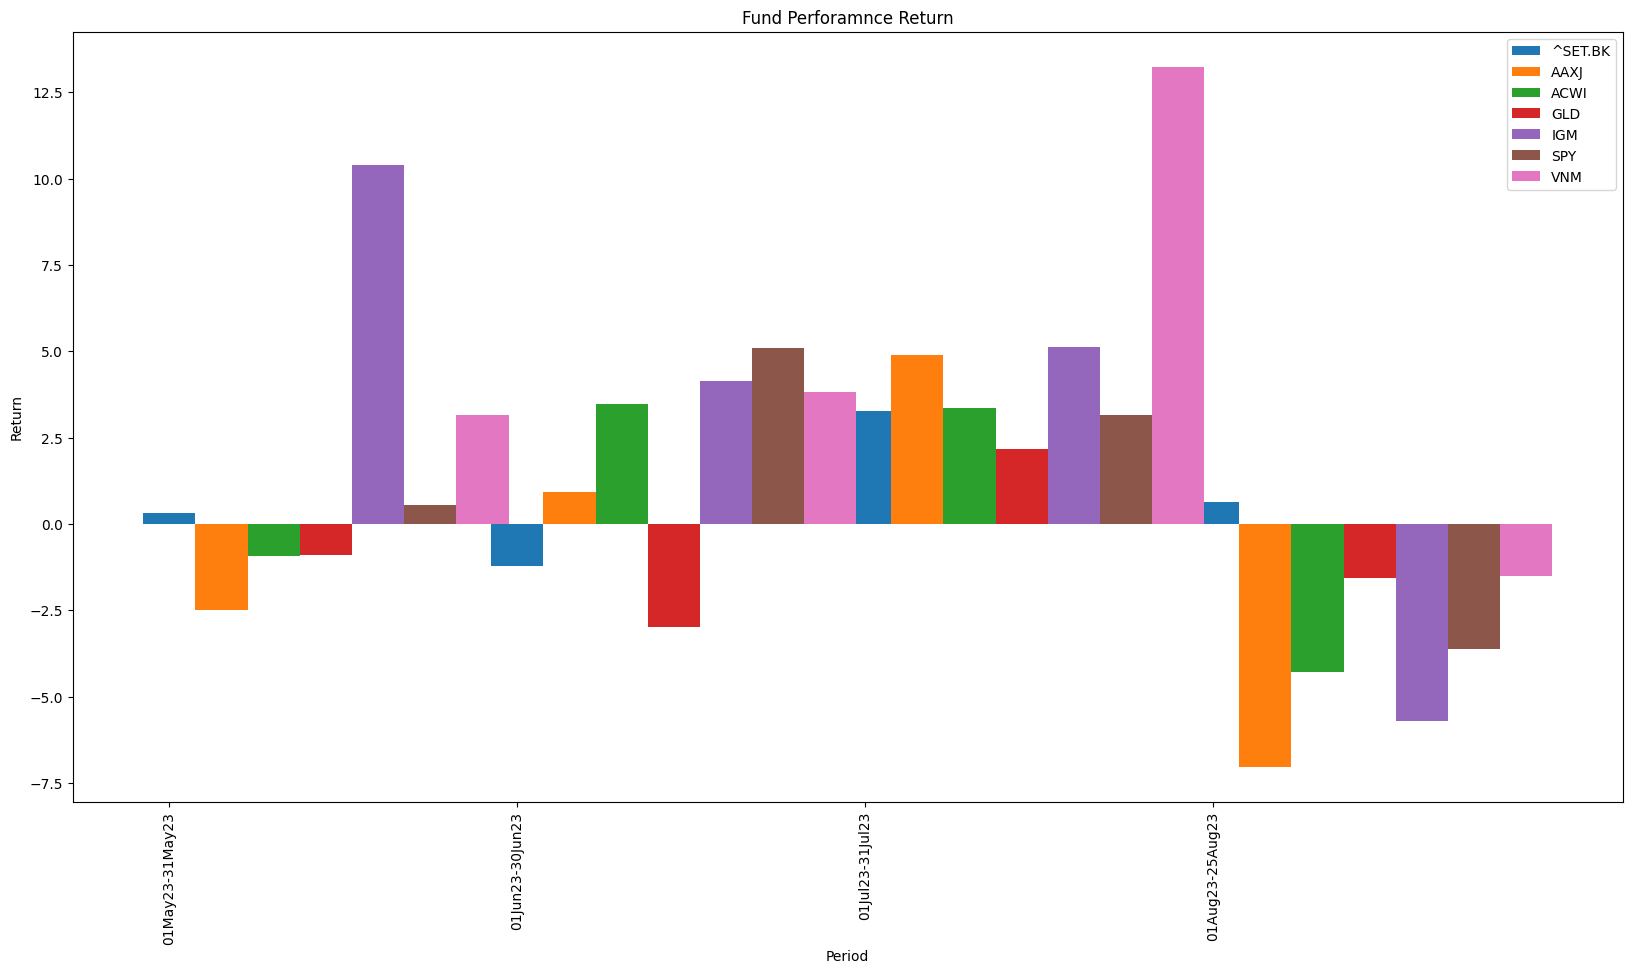

In [31]:
fundReturn_df=fundPerfByPeriod_df[list_fund_name]
fig = plt.figure(figsize = (20, 10))
X_axis = np.arange(len(fundReturn_df)) # length of column to fix axis=y
X_point=0.00
X_width=0.15

for colName  in fundReturn_df.columns:
    
    plt.bar(X_axis+X_point,fundReturn_df[colName],X_width, label =colName)
    X_point+=X_width

# length of column to fix axis=y
plt.xticks(X_axis, fundReturn_df.index,rotation='vertical')
plt.xlabel("Period")
plt.ylabel("Return")
plt.title(f"Fund Perforamnce Return")
plt.legend()

plt.savefig(f'{report_path}\\Return_{from_str}_{to_str}.png')

plt.show()



In [32]:
fundPerfByPeriod_df

,Start_Date,End_Date,^SET.BK,AAXJ,ACWI,GLD,IGM,SPY,VNM,_AVG_
Period,,,,,,,,,,
01May23-31May23,2023-05-01,2023-05-31,0.33,-2.50,-0.92,-0.90,10.41,0.56,3.15,1.45
01Jun23-30Jun23,2023-06-01,2023-06-30,-1.20,0.93,3.48,-2.99,4.13,5.09,3.83,1.90
01Jul23-31Jul23,2023-07-01,2023-07-31,3.27,4.91,3.35,2.17,5.12,3.15,13.24,5.03
01Aug23-25Aug23,2023-08-01,2023-08-25,0.64,-7.03,-4.28,-1.57,-5.69,-3.62,-1.49,-3.29


In [33]:
def find_rank(fund_temp,list_fundX,FinalRank_ColName):
     fundPerfRank=fund_temp[list_fundX]
     fundPerfRank=fundPerfRank.T   
     for colNameToRank in fundPerfRank.columns:
      fundPerfRank[colNameToRank]=fundPerfRank[colNameToRank].rank(method='max')   
     return fundPerfRank

rankCol_name_all='AllRank'
fundRank_df=find_rank(fundPerfByPeriod_df[list_fund_name],list_fund_name,rankCol_name_all)
fundRank_df=fundRank_df.T 
fundRank_df

,^SET.BK,AAXJ,ACWI,GLD,IGM,SPY,VNM
Period,,,,,,,
01May23-31May23,4.0,1.0,2.0,3.0,7.0,5.0,6.0
01Jun23-30Jun23,2.0,3.0,4.0,1.0,6.0,7.0,5.0
01Jul23-31Jul23,3.0,5.0,4.0,1.0,6.0,2.0,7.0
01Aug23-25Aug23,7.0,1.0,3.0,5.0,2.0,4.0,6.0


In [34]:
dfSummary=pd.concat([\
                     fundPerfByPeriod_df[list_fund_name].sum().to_frame(name='total_return'),\
                     fundRank_df.sum().to_frame(name='sum_rank_score'),\
                    ],axis=1)
dfSummary.fillna(value=0,inplace=True)
dfSummary

,total_return,sum_rank_score
^SET.BK,3.04,16.0
AAXJ,-3.69,10.0
ACWI,1.63,13.0
GLD,-3.29,10.0
IGM,13.97,21.0
SPY,5.18,18.0
VNM,18.73,24.0


In [35]:
dfFinalScore=pd.DataFrame(index=dfSummary.index)
dfFinalScore

""
^SET.BK
AAXJ
ACWI
GLD
IGM
SPY
VNM


In [36]:
for colNameToRank in dfSummary.columns:
  dfFinalScore[f"{colNameToRank}_rank"]=dfSummary[colNameToRank].rank(method='max')  
dfFinalScore=pd.concat([dfFinalScore,dfFinalScore.sum(axis=1).to_frame("TotalScore")],axis=1)
dfFinalScore

,total_return_rank,sum_rank_score_rank,TotalScore
^SET.BK,4.0,4.0,8.0
AAXJ,1.0,2.0,3.0
ACWI,3.0,3.0,6.0
GLD,2.0,2.0,4.0
IGM,6.0,6.0,12.0
SPY,5.0,5.0,10.0
VNM,7.0,7.0,14.0


In [37]:
dfSummary=pd.merge(left=dfSummary,right=dfFinalScore,left_index=True,right_index=True)
dfSummary.sort_values(by='TotalScore',ascending=False,inplace=True)
dfSummary.sort_index(axis=1,ascending=False,inplace=True)
dfSummary



,total_return_rank,total_return,sum_rank_score_rank,sum_rank_score,TotalScore
VNM,7.0,18.73,7.0,24.0,14.0
IGM,6.0,13.97,6.0,21.0,12.0
SPY,5.0,5.18,5.0,18.0,10.0
^SET.BK,4.0,3.04,4.0,16.0,8.0
ACWI,3.0,1.63,3.0,13.0,6.0
GLD,2.0,-3.29,2.0,10.0,4.0
AAXJ,1.0,-3.69,2.0,10.0,3.0


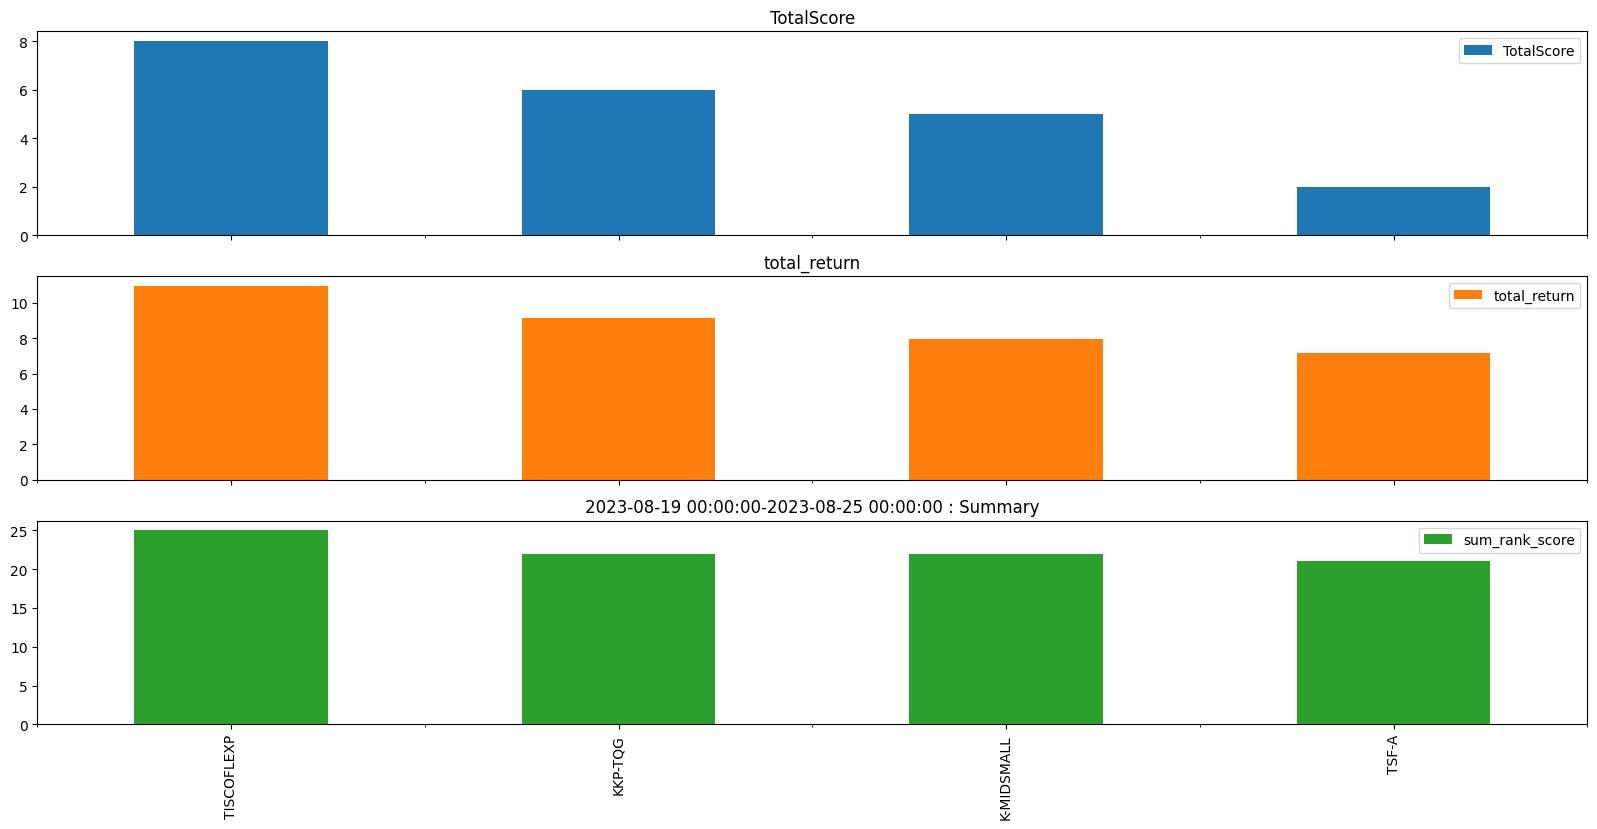

In [54]:
colToPlots=['TotalScore','total_return','sum_rank_score' ]

dfSummary[colToPlots].plot(kind='bar',layout=(len(colToPlots),1),
                      subplots=True,figsize=(20, 3*len(colToPlots)))
plt.title(f"{start_date}-{end_date} : Summary")
plt.savefig(f'{report_path}\\{from_str}-{to_str}-summary.png')
   
plt.show()

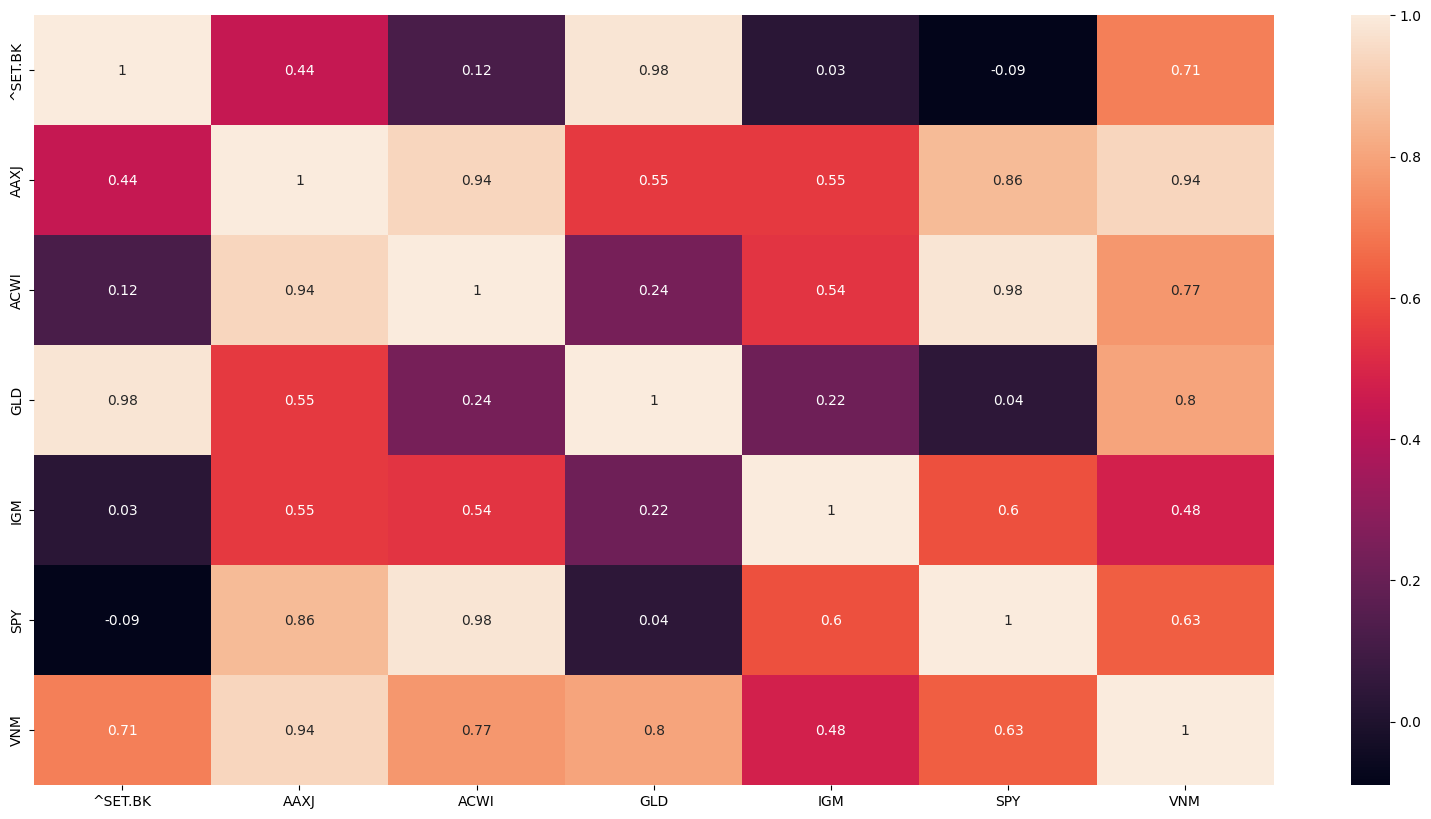

,^SET.BK,AAXJ,ACWI,GLD,IGM,SPY,VNM
^SET.BK,1.00,0.44,0.12,0.98,0.03,-0.09,0.71
AAXJ,0.44,1.00,0.94,0.55,0.55,0.86,0.94
ACWI,0.12,0.94,1.00,0.24,0.54,0.98,0.77
GLD,0.98,0.55,0.24,1.00,0.22,0.04,0.80
IGM,0.03,0.55,0.54,0.22,1.00,0.60,0.48
SPY,-0.09,0.86,0.98,0.04,0.60,1.00,0.63
VNM,0.71,0.94,0.77,0.80,0.48,0.63,1.00


In [41]:


corr_df = fundReturn_df.corr ()  
corr_df = corr_df .round(2)

fig = plt.figure(figsize = (20, 10))
heatmap = seaborn. heatmap(corr_df, annot = True)
plt.savefig(f'{report_path}\\Corr_{from_str}_{to_str}.png')
plt. show ()  

corr_df


In [42]:
report_file = os.path .join(report_path, "Report.xlsx")
writer=pd.ExcelWriter(report_file,engine='xlsxwriter') 

fundPerfByPeriod_df.to_excel(writer, sheet_name="Return")
fundRank_df.to_excel(writer, sheet_name="RANK")
dfFinalScore.to_excel(writer, sheet_name="Final Score")
dfSummary.to_excel(writer, sheet_name="Summary")
corr_df.to_excel(writer, sheet_name="Corr",index=True)

writer.save()




C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24688\3740856608.py:10: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
